# Find the best markets to advertise product

## Introduction

We were asked by e-learning company which offers courses on programing to recommend two best markets to advertise their products in. Most of their courses are on web and mobile development but they also cover other domains, like data science, game development etc. We have found quite represantative dataset on Github performed by freeCodeCamp in 2017. There was 18,000 people who were asked how they are learning to code.

### Summary of results

We can advertise our e-learning products in US and India. While in US there is a lot of people interested in coding and they spend on average more then 59 dol. India is also quite good choise once the GDP is growing rapidly and there is more people learning coding then in different English speaking countires.
## Data exploration

In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [355]:
survey = pd.read_csv('data//2017-fCC-New-Coders-Survey-Data.csv')

In [356]:
# shape of dataset
survey.shape

(18175, 136)

In [16]:
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [357]:
# columns overview
survey.columns

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)

We could orginize our own survey with questions we want but its costly instead we can use this free dataset which suits our needs quite well. This survay contains over 18,000 responses from people learning coding less then 5 years about what is their way of learning it. This dataset can be downloaded at [Link](https://github.com/freeCodeCamp/2017-new-coder-survey). Lets explore JobRoleInterest column which includes answers on which subject a particular responser is interested.

In [358]:
survey['JobRoleInterest']

0                                                      NaN
1                                 Full-Stack Web Developer
2          Front-End Web Developer, Back-End Web Develo...
3          Front-End Web Developer, Full-Stack Web Deve...
4        Full-Stack Web Developer, Information Security...
                               ...                        
18170                                                  NaN
18171      DevOps / SysAdmin,   Mobile Developer,   Pro...
18172                                                  NaN
18173                                                  NaN
18174    Back-End Web Developer, Data Engineer,   Data ...
Name: JobRoleInterest, Length: 18175, dtype: object

There was a multi selection answer possible and we can see that most of the people are interested in more then one subject.

## Data analysis

### Most popular subjects

In [359]:
# We need to loop throught each response to count number of times each accures.
job_roles={}
for response in survey['JobRoleInterest']:
    if str(response) != 'nan':
        for each in response.split(','):
            if each in job_roles:
                job_roles[each] +=1
            else:
                job_roles[each] = 1

In [40]:
max(job_roles,key=job_roles.get)

' Full-Stack Web Developer'

We have counted all subjects and the most popular subject is Full-Stack Web Developer. 

In [59]:
roles_series = pd.Series(job_roles)

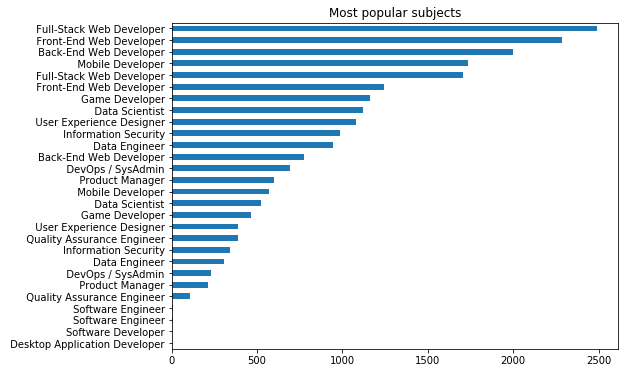

In [360]:
roles_series[roles_series>2].sort_values().plot.barh(figsize=(8,6),title='Most popular subjects')

### Web and Mobile development roles

Lets now explore how many people is interested in Web or Mobile development.

In [361]:
# looping through JobRoleInterest column to check each response
people_interested_web_or_mobile=0
for response in survey['JobRoleInterest']:
    if str(response) != 'nan':
        if 'Web Developer' in response or 'Mobile Developer' in response:
            people_interested_web_or_mobile +=1

In [128]:
print(people_interested_web_or_mobile)
print(round(people_interested_web_or_mobile/survey.shape[0]*100))

6030
33


We can see that there is 6030 people interested at least in one of web or mobile development. Which is 33% of total people who filled the survey.

In [129]:
survey_answered = survey[survey['JobRoleInterest'].notnull()].copy()

In [130]:
round(6030/len(survey_answered)*100)

86

We have dropped all rows in which there was no answer on Job role interest question. 86% of people who answered on this question said they want to learn either Web or Mobile development. 

It looks like our dataset is representative because most of the people who participated in the survey are interested in learning Web or Mobile coding. The rest of them is interested in different topics but our company is not only limited to this two which is also fine.

In [131]:
survey_web = survey_answered[survey_answered['JobRoleInterest'].str.contains(r'Web Developer|Mobile Developer')]

### Countries with interested people

There are two columns having data on location of participants. One of them is CountryLive describing in which country the responder is right now.

In [328]:
survey_answered['CountryLive'].value_counts(normalize=True).head(10)

United States of America    0.457005
India                       0.077216
United Kingdom              0.046066
Canada                      0.038023
Poland                      0.019158
Brazil                      0.018865
Germany                     0.018280
Australia                   0.016379
Russia                      0.014917
Ukraine                     0.013016
Name: CountryLive, dtype: float64

In [237]:
# Absolute number of people in top countries
survey_answered['CountryLive'].value_counts().head(4)

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Name: CountryLive, dtype: int64

Here we can see that over 45% of the people are leaving in the USA, the second biggest potential market is in India. Lets also explore how much money they are willing to spend on their courses. To do this we can check MoneyForLearning column and devide this by MonthsPrograming to see how much they spend per month.
### Data wrangling

In [137]:
survey_answered['MonthsProgramming'].replace(0,1,inplace=True)
survey_answered['spend_month'] = survey_answered['MoneyForLearning']/survey_answered['MonthsProgramming']

In [142]:
(survey_answered['spend_month'].isnull()).sum()

675

There is 675 students who didn't answer how much they spend. We are interested in which country students spend the most so lets drop this rows.

In [146]:
survey_valid = survey_answered[(survey_answered['spend_month'].notnull()) &(survey_answered['CountryLive'].notnull())]

We have droped all rows with NaN values in either spend_month or CountryLive becasue as our best market criteria we can use the location.

In [301]:
country_grouped = survey_valid.groupby('CountryLive')['spend_month'].agg(np.mean).sort_values(ascending=False)
country_grouped.head(10)

CountryLive
Yemen                10000.000000
Puerto Rico           4291.394558
Austria                936.208333
Spain                  784.553084
Jamaica                747.037037
Hong Kong              523.341049
Trinidad & Tobago      500.000000
Australia              419.268452
Taiwan                 417.966524
Luxembourg             338.817664
Name: spend_month, dtype: float64

Once we sow that top 4 countries are English speaking countries and courses delivered by the company are in English lets focus only on these countries.

In [303]:
country_of_interest = ['United States of America','India','United Kingdom','Canada']
country_grouped = country_grouped.reset_index()
country_grouped[country_grouped['CountryLive'].isin(country_of_interest)]

,CountryLive,spend_month
22,United States of America,227.997996
27,India,135.100982
30,Canada,113.510961
57,United Kingdom,45.534443


Here we can see how much on average users spend on learning programing in 4 countires. Lets dig deeper into this numbers.

### Statistics

Money spend per month, data distribution.

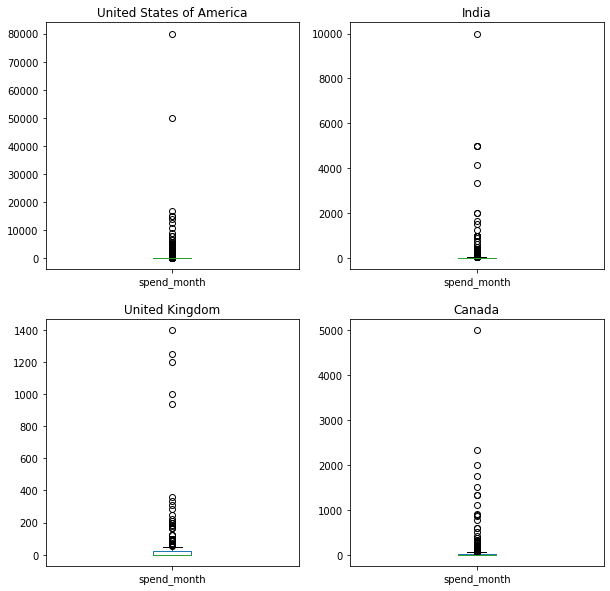

In [304]:
ax= plt.figure(figsize=(10,10))
ax = plt.subplot(2,2,1)
ax = survey_valid[survey_valid['CountryLive']==country_of_interest[0]]['spend_month'].plot.box(title=country_of_interest[0])
ax = plt.subplot(2,2,2)
ax = survey_valid[survey_valid['CountryLive']==country_of_interest[1]]['spend_month'].plot.box(title=country_of_interest[1])
ax = plt.subplot(2,2,3)
ax = survey_valid[survey_valid['CountryLive']==country_of_interest[2]]['spend_month'].plot.box(title=country_of_interest[2])
ax = plt.subplot(2,2,4)
ax = survey_valid[survey_valid['CountryLive']==country_of_interest[3]]['spend_month'].plot.box(title=country_of_interest[3])

For each of this countries we can note big outliers! Lets remove some extremes. First we need to find an outlier for each country. We can calculate a standard diviation.

#### US

Outlierers above: 1939.9148246779198


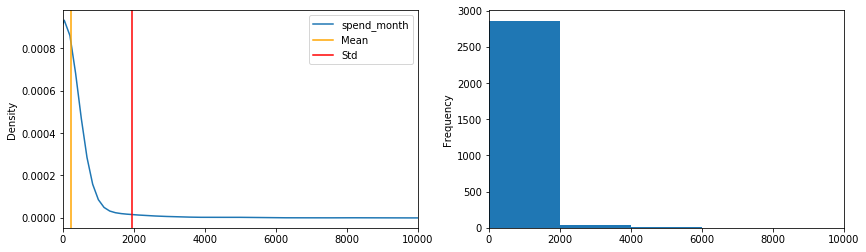

In [362]:
# filtering only US
survey_usa = survey_valid[survey_valid['CountryLive']==country_of_interest[0]].copy()

# calculating mean nad std 
usa_mean = survey_usa['spend_month'].mean()
usa_std = survey_usa['spend_month'].std(ddof=0)
print('Outlierers above: '+ str(usa_std))

# plotting kernel density plot and histogram 
ax = plt.figure(figsize=(14,4))
ax = plt.subplot(1,2,1)
ax = survey_usa['spend_month'].plot.kde(xlim=(survey_usa['spend_month'].min(),10000))
plt.axvline(usa_mean,color='orange',label='Mean')
plt.axvline(usa_std,color='red',label='Std')
plt.legend()
ax = plt.subplot(1,2,2)
ax = survey_usa['spend_month'].plot.hist(bins=40,xlim=(0,10000))

Most of the people spend less then $2000 a month. So once we target in most people we want to make sure that majority of people may affort course for 59 dol.

#### India

In [323]:
# calculating mean nad std 
survey_india = survey_valid[survey_valid['CountryLive']==country_of_interest[1]].copy()
india_std = survey_india['spend_month'].std(ddof=0)
print('Outliers above: '+ str(india_std))

Outliers above: 692.2116361597537


#### UK

In [324]:
# calculating mean nad std 
survey_uk = survey_valid[survey_valid['CountryLive']==country_of_interest[2]].copy()
uk_std = survey_uk['spend_month'].std(ddof=0)
print('Outliers above: '+ str(uk_std))

Outliers above: 162.02069337361618


#### Canada

In [325]:
# calculating mean nad std 
survey_canada = survey_valid[survey_valid['CountryLive']==country_of_interest[3]].copy()
canada_std = survey_canada['spend_month'].std(ddof=0)
print('Outlierers above: '+ str(canada_std))

Outlierers above: 440.09441909041453


We have determined outliers for each countrie by calculating standard diviations and now we can remove all values above this treshold - once we are interested in finding market on which we can sell our product.

#### Money per month distributions: mean, std and z score

In [372]:
usa_mean = survey_usa[survey_usa['spend_month']<1940]['spend_month'].mean()
usa_std = survey_usa[survey_usa['spend_month']<1940]['spend_month'].std(ddof=0)
z_score_usa = (59 - usa_mean)/usa_std
print('Mean: ' +str(usa_mean) +'\n'+'Z score: ' +str(z_score_usa))

Mean: 82.84772372470415
Z score: -0.10123065248539234


In [373]:
canada_mean = survey_canada[survey_canada['spend_month']<441]['spend_month'].mean()
canada_std = survey_canada[survey_canada['spend_month']<441]['spend_month'].std(ddof=0)
z_score_canada = (59 - canada_mean)/canada_std
print('Mean: ' +str(canada_mean) +'\n'+'Z score: ' +str(z_score_canada))

Mean: 25.750434704996106
Z score: 0.496813286271849


In [374]:
uk_mean = survey_uk[survey_uk['spend_month']<163]['spend_month'].mean()
uk_std = survey_uk[survey_uk['spend_month']<163]['spend_month'].std(ddof=0)
z_score_uk = (59 - uk_mean)/uk_std
print('Mean: ' +str(uk_mean) +'\n'+'Z score: ' +str(z_score_uk))

Mean: 13.45891045197768
Z score: 1.7555310461555749


In [375]:
india_mean = survey_india[survey_india['spend_month']<693]['spend_month'].mean()
india_std = survey_india[survey_india['spend_month']<693]['spend_month'].std(ddof=0)
z_score_india = (59 - india_mean)/india_std
print('Mean: ' +str(india_mean) +'\n'+'Z score: ' +str(z_score_india))

Mean: 27.172144760764997
Z score: 0.4163070457753882


Based on our analysis we can expressly say that its worth to advertise in US but the second place is not so easy to chose. While we are focus only on English speaking countires lets analyse Australia once there are also some interested people.

In [377]:
survey_australia = survey_valid[survey_valid['CountryLive']=='Australia'].copy()
australia_std = survey_australia['spend_month'].std(ddof=0)
print('Outliers above: '+ str(australia_std))
australia_mean = survey_australia[survey_australia['spend_month']<2199]['spend_month'].mean()
australia_std = survey_australia[survey_australia['spend_month']<2199]['spend_month'].std(ddof=0)
z_score_australia = (59 - australia_mean)/australia_std
print('Mean: ' +str(australia_mean) +'\n'+'Z score: ' +str(z_score_australia))

Outliers above: 2198.38856300141
Mean: 62.997096586382305
Z score: -0.02462726176990913


It seams that Australia is doing pretty well. Its z score is around -0.025 which is less then 0 which means that \\$59 is less then mean value people spend on e-learning programing in this country. Lets explore how many people in absolute number was spending \\$59, after removing outliers.

In [349]:
survey_australia[(survey_australia['spend_month']<2199)&(survey_australia['spend_month']>=59)]['spend_month'].count()

18

But there is only 18 people who spend 59$ per month or more excluding extreme. Lets go back to India and Canada once they had more people in survey.

In [350]:
survey_india[(survey_india['spend_month']<693) & (survey_india['spend_month']>=59)]['spend_month'].count()

54

In [351]:
survey_canada[(survey_canada['spend_month']<441)&(survey_canada['spend_month']>=59)]['spend_month'].count()

25

It looks like in India there is 54 people who spend at least 59$ per month and its 2 times more then in Canada. Taking into account GDP growth which is for India over 6\% anually while in Canada its 3\%. If we consider also population of each country we can say India is better choise.

## Conclusion

We can advertise our e-learning products in US and India. While in US there is a lot of people interested in coding and they spend on average more then 59 dol. India is also quite good choise once the GDP is growing rapidly and there is more people learning coding then in different English speaking countires.